In [1]:
%matplotlib ipympl

In [2]:
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
import numpy as np
import scipy
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

In [3]:
@element(num_params=3, units=["Ohm", "Ohm", "F"],overwrite=True)
def TLMilinNew(p,f):
    omega = 2 * np.pi * np.array(f)
    R1, R2, Q = p[0], p[1], p[2]
    t12=R1/R2
    Rion1=R1
    Rion2=R2
    wclin1=1/(Rion1*Q)
    wclin2=1/(Rion2*Q)
    S1=np.sqrt(1j*omega/wclin1)
    S2=np.sqrt(1j*omega/wclin2)
    
    Z = -(2*1j*R1/S1)*(((scipy.special.yv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.jv(0,-2*1j*S1/(t12-1))))-((scipy.special.jv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.yv(0,-2*1j*S1/(t12-1)))))/(((scipy.special.jv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.yv(1,-2*1j*S1/(t12-1))))-((scipy.special.yv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.jv(1,-2*1j*S1/(t12-1)))))
    
    return Z

@element(num_params=3, units=["Ohm", "Ohm", "F"],overwrite=True)
def TLMilinNewzert(p,f):
    omega = 2 * np.pi * np.array(f)
    R1, R2, Q = p[0], p[1], p[2]
    wclin1=1/(R1*Q)
    eps=R1/R2-1
    S=np.sqrt(1j*omega/wclin1)
    Z=-2*R1*(np.exp(2*S)+1)**2/((eps*(S**2+1/2)*np.exp(2*S)+(-S-(1/4)*eps)*np.exp(4*S)+S-(1/4)*eps))

    return Z
@element(num_params=3, units=["Ohm", "Ohm", "F"],overwrite=True)
def TLMilinNewzertSecond(p,f):
    omega = 2 * np.pi * np.array(f)
    R1, R2, Q = p[0], p[1], p[2]
    wclin1=1/(R1*Q)
    eps=R1/R2-1
    S=np.sqrt(1j*omega/wclin1)

    Z=2*R1*4*(np.exp(4*S)+2*np.exp(2*S)+1)*(np.exp(2*S)+1)*S/((((S**4+2*S**3+2*S**2+3/2*S+9/8)*eps**2+(-4*S**3-S)*eps-4*S**2)*np.exp(2*S)+((-S**4+2*S**3-2*S**2+3/2*S-9/8)*eps**2+(-4*S**3-S)*eps+4*S**2)*np.exp(4*S)+(-(1/8)*eps**2+S*eps+4*S**2)*np.exp(6*S)-4*S**2+S*eps+(1/8)*eps**2))
    
    return Z



In [4]:
initial_guess=[1.1,1,6.61e-4]
tlmilin=CustomCircuit(initial_guess=initial_guess,circuit='TLMilinNew')
tlmilin_zert=CustomCircuit(initial_guess=initial_guess,circuit='TLMilinNewzert')
tlmilin_zert_2=CustomCircuit(initial_guess=initial_guess,circuit='TLMilinNewzertSecond')

In [5]:
f_pred = np.logspace(4,-3,num=100)
tlmilin_pred = tlmilin.predict(f_pred)
tlmilin_zert_pred = tlmilin_zert.predict(f_pred)
tlmilin_zert_2_pred = tlmilin_zert_2.predict(f_pred)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")
C:\Users\admin\AppData\Local\Temp\ipykernel_35176\3184444182.py:13: RuntimeWarning: divide by zero encountered in divide
  Z = -(2*1j*R1/S1)*(((scipy.special.yv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.jv(0,-2*1j*S1/(t12-1))))-((scipy.special.jv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.yv(0,-2*1j*S1/(t12-1)))))/(((scipy.special.jv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.yv(1,-2*1j*S1/(t12-1))))-((scipy.special.yv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.jv(1,-2*1j*S1/(t12-1)))))
C:\Users\admin\AppData\Local\Temp\ipykernel_35176\3184444182.py:13: RuntimeWarning: invalid value encountered in divide
  Z = -(2*1j*R1/S1)*(((scipy.special.yv(1,-2*1j*t12*S2/(t12-1)))*(scipy.special.jv(0,-2*1j*

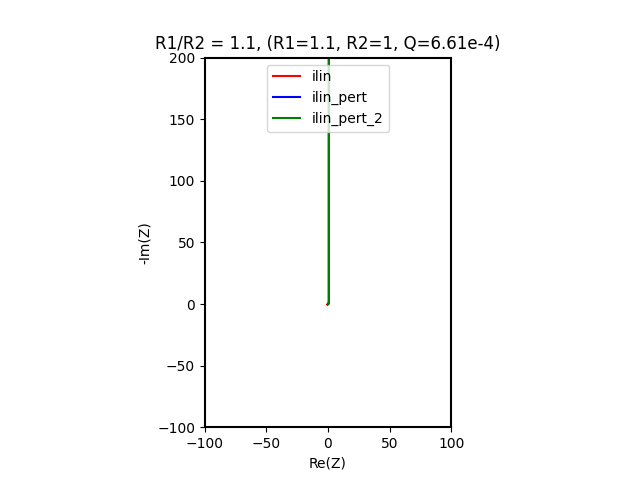

In [6]:
plt.rcParams['axes.linewidth'] = 1.5
ax= plt.figure().add_subplot()
ax.set_title("R1/R2 = 1.1, (R1=1.1, R2=1, Q=6.61e-4)")
# # factor=194.56/1.5
factor=1
ax.plot(np.real(tlmilin_pred),-np.imag(tlmilin_pred),"r",label="ilin")
ax.plot(np.real(tlmilin_zert_pred),-np.imag(tlmilin_zert_pred),"b",label="ilin_pert")
ax.plot(np.real(tlmilin_zert_2_pred),-np.imag(tlmilin_zert_2_pred),"g",label="ilin_pert_2")
#ax.plot(np.real(tlmlin_semi_pred)/factor,-np.imag(tlmlin_semi_pred)/factor,"g",label="lin_semi")
#ax.plot(np.real(tlmlin_mix_pred)/factor,-np.imag(tlmlin_mix_pred)/factor,"y",label="lin_mix")
#ax.plot(np.real(tlmlin_zert_21_pred)/factor,-np.imag(tlmlin_zert_21_pred)/factor,"pink",label="lin_pert_21")
#ax.plot(np.real(tlmlin_zert_22_pred)/factor,-np.imag(tlmlin_zert_22_pred)/factor,"g",label="lin_pert_22")
#ax.legend(loc="upper center",ncol=4,bbox_to_anchor=[0.5,-0.14])
ax.legend(loc="upper center")
ax.set_xlabel("Re(Z)")
ax.set_ylabel("-Im(Z)")
ax.set_aspect("equal")
ax.set_xlim(-100,100)
ax.set_ylim(-100,200)
plt.rcParams['axes.linewidth'] = 1

In [7]:
def give_chi_square(z1,z2):
    return np.sum((np.real(z1)-np.real(z2))**2), np.sum((np.imag(z1)-np.imag(z2))**2)

def give_chi_square_normalized(z1,z2):
    return np.sqrt((np.sum(((np.real(z1)-np.real(z2)))**2))/len(z1)), np.sqrt(np.sum((np.imag(z1)-np.imag(z2))**2)/len(z1))

def give_relative_errors(z1,z2):
    return np.sqrt((np.sum(((np.real(z1)-np.real(z2))/np.real(z2))**2))/len(z1)), np.sqrt(np.sum(((np.imag(z1)-np.imag(z2))/np.imag(z2))**2)/len(z1))



import pandas as pd

models=["lin","lin_pert","lin_pert_21","lin_pert_22"]
R1R2_cases=[(100,1),(1.1,1),(2,1),(2.5,1),(3,1),(1,100),(1,1.1),(1,2),(1,2.5),(1,3)]
#R1R2_cases_re_and_im=[R1R2_cases,["Re","Im"]]
R1R2_cases=[f"{i[0]} by {i[1]}" for i in R1R2_cases]

index=[R1R2_cases,["Re","Im"]]
index=pd.MultiIndex.from_product(index)

SD_non_normal_df=pd.DataFrame(columns=models,index=index)
SD_normal_df=pd.DataFrame(columns=models,index=index)
relative_normal_df=pd.DataFrame(columns=models,index=index)


for i in R1R2_cases:
   
   xlsx = pd.ExcelFile(f"lin_R1_by_R2 ({i})100.xlsx")
   zz_ilin=pd.read_excel(xlsx,sheet_name="lin",header=None)
   zz_ilin=zz_ilin.to_numpy()
   zz_ilin=zz_ilin[0]+1j*zz_ilin[1]

   for j in models:
       zz=pd.read_excel(xlsx,sheet_name=j,header=None)
       zz=zz.to_numpy()
       zz=zz[0]+1j*zz[1]

       chi_sqr_non_normal=give_chi_square(zz,zz_ilin)
       SD_non_normal_df.at[i,j]=chi_sqr_non_normal

       chi_sqr_normal=give_chi_square_normalized(zz,zz_ilin)
       SD_normal_df.at[i,j]=chi_sqr_normal
       
       relative_normal=give_relative_errors(zz,zz_ilin)
       relative_normal_df.at[i,j]=relative_normal
       

#exwrite=pd.ExcelWriter("ilin fc by 100 to 5 Hz.xlsx")
#chi_sqr_non_normal_df.to_excel(exwrite,sheet_name="non-normalized")
#chi_sqr_normal_df.to_excel(exwrite,sheet_name="noramlized")

with pd.ExcelWriter(
    "lin SD error fc by 100 to 5 Hz.xlsx",
    mode="w",
) as writer:
    SD_non_normal_df.to_excel(writer,sheet_name="non-normalized")
    SD_normal_df.to_excel(writer,sheet_name="noramlized")
    relative_normal_df.to_excel(writer,sheet_name="relative")

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\admin\AppData\Local\Packages\Pytho

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


11


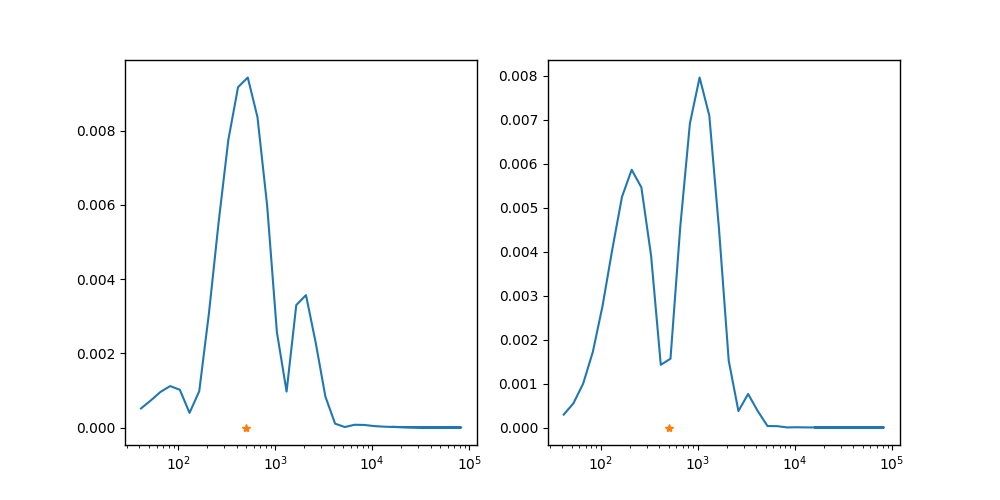

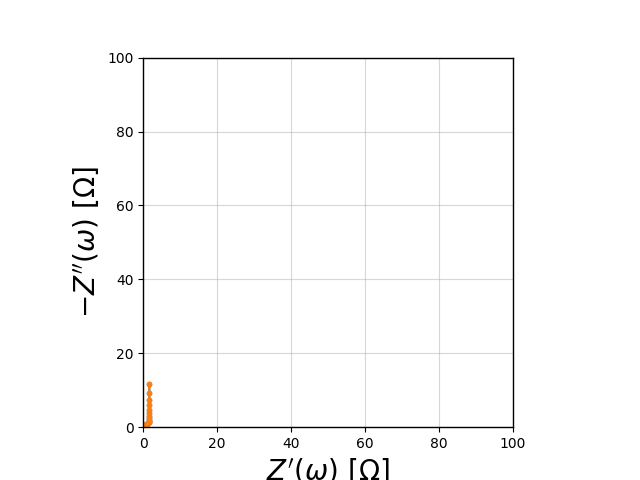

In [30]:
plt.close()
R1=3
R2=1

xlsx2 = pd.ExcelFile(f"lin_R1_by_R2 ({R1} by {R2})100.xlsx")
zz_lin=pd.read_excel(xlsx2,sheet_name="lin",header=None)
zz_lin_arr=zz_lin.to_numpy()
zz_lin=zz_lin_arr[0]+1j*zz_lin_arr[1]
zz_lin_freq=zz_lin_arr[2]

zz_lin_pert_22=pd.read_excel(xlsx2,sheet_name="lin_pert_22",header=None)
zz_lin_pert_22_arr=zz_lin_pert_22.to_numpy()
zz_lin_pert_22=zz_lin_pert_22_arr[0]+1j*zz_lin_pert_22_arr[1]



#plot_nyquist(zz_lin,color="red")
#plot_nyquist(zz_lin_pert_22,color="blue")

r_err_real=np.abs(((np.real(zz_lin)-np.real(zz_lin_pert_22))/np.real(zz_lin)))

r_err_imag=np.abs(((np.imag(zz_lin)-np.imag(zz_lin_pert_22))/np.imag(zz_lin)))

a_err_real=np.abs(np.real(zz_lin)-np.real(zz_lin_pert_22))
a_err_imag=np.abs(np.imag(zz_lin)-np.imag(zz_lin_pert_22))

fig, [axx1, axx2]= plt.subplots(1,2)
# fig.("relative errors vs freq")
fig.set_size_inches(10,5)
#axx1.semilogx(zz_lin_freq,r_err_real,"red")
axx1.semilogx(zz_lin_freq,a_err_real)
freq_c=1/(R1*6.61e-4)
axx1.plot(freq_c,0,"*")

#axx2.semilogx(zz_lin_freq,r_err_imag,"red")
axx2.semilogx(zz_lin_freq,a_err_imag)
axx2.plot(freq_c,0,"*")
plt.subplots_adjust()

def find_index_of_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

idx=find_index_of_nearest(zz_lin_freq,freq_c)

fig2, ax23=plt.subplots()
plot_nyquist(zz_lin,ax=ax23)
plot_nyquist(zz_lin_pert_22,ax=ax23)
ax23.plot(zz_lin_freq[idx],1,"*")
ax23.set_xlim(0,100)
ax23.set_ylim(0,100)

print(idx)